In [1]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

from bin.edge_loop import EdgeLoop
from bin.adj_image_array import invert

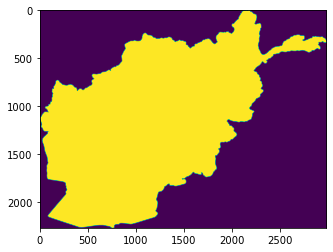

In [2]:
im = np.pad(invert(np.array(Image.open('lib/silhouettes/afghanistan-silhouette.bmp').convert('L'))), 1)
plt.imshow(im)

In [3]:
edgeloop = EdgeLoop(im)

In [4]:
loop = edgeloop.edge_loop()

AttributeError: 'tuple' object has no attribute 'x'